# 1.数据预处理

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basket=pd.read_csv("Basket-2018-06-01-2018-07-05.csv")

In [8]:
basket.isnull()#查看所有缺失值
basket2=data.dropna()
print(basket2)

       SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0         2018-06-01       D007       3     250458        8.00
1         2018-06-01       D007       3     250200       32.70
2         2018-06-01       D007       1     161068       16.80
3         2018-06-01       D007       8       5325       30.40
4         2018-06-01       D007       8       5361      191.30
...              ...        ...     ...        ...         ...
571547    2018-07-05       A010       2     284211       34.71
571548    2018-07-05       A010       2     284601       44.80
571549    2018-07-05       A010       2     284241        6.50
571550    2018-07-05       A010       2     284352       15.90
571551    2018-07-05       A010       2     284265       43.20

[571552 rows x 5 columns]


In [9]:
#数据大小
basket2.shape
#数据分布情况
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [19]:
basket2=basket2[basket2['BASK_SPEND']>0]  #剔除data中bask_spend列小于0的行

In [21]:
basket2.describe()

,POS_NO,BASK_CODE,BASK_SPEND,year
count,569797.000000,569797.000000,569797.000000,569797.0
mean,2.994330,167572.136898,39.583197,2018.0
std,2.502507,87224.915886,196.158166,0.0
min,1.000000,961.000000,0.010000,2018.0
25%,1.000000,90673.000000,9.000000,2018.0
50%,2.000000,177692.000000,20.000000,2018.0
75%,3.000000,238933.000000,44.800000,2018.0
max,20.000000,323914.000000,79920.000000,2018.0


In [32]:
basket2["SHOP_DATETIME"] = pd.to_datetime(basket2["SHOP_DATETIME"])#将下单日期改为datetime类型
basket2['year'] = basket2["SHOP_DATETIME"].dt.year
basket2['month'] = basket2['SHOP_DATETIME'].dt.month
basket2['day']= basket2['SHOP_DATETIME'].values.astype('datetime64[D]')#方便后续的分析，新增加年份列和月份列

D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\program\ananconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
basket2

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND,year,month,day
0,2018-06-01,D007,3,250458,8.00,2018,6,2018-06-01
1,2018-06-01,D007,3,250200,32.70,2018,6,2018-06-01
2,2018-06-01,D007,1,161068,16.80,2018,6,2018-06-01
3,2018-06-01,D007,8,5325,30.40,2018,6,2018-06-01
4,2018-06-01,D007,8,5361,191.30,2018,6,2018-06-01
...,...,...,...,...,...,...,...,...
571547,2018-07-05,A010,2,284211,34.71,2018,7,2018-07-05
571548,2018-07-05,A010,2,284601,44.80,2018,7,2018-07-05
571549,2018-07-05,A010,2,284241,6.50,2018,7,2018-07-05
571550,2018-07-05,A010,2,284352,15.90,2018,7,2018-07-05


# 2.销售额分析

## 2.1每日销售额求和 

In [43]:
# 整体销售情况子数据集，包含下单日期、销售额、年份、月份信息
sales_data = basket2[['SHOP_DATETIME','BASK_SPEND','month','day']]
#按照年份、月份对销售子数据集进行分组求和
sales_year = sales_data.groupby(['month','day']).sum()
sales_year.style.background_gradient()# 颜色越深，销售额越高
#按周六日呈周期性递增态势

##  按商店的销售额分析

In [77]:
Market_Sales = basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)
Market_Sales["percent"] = Market_Sales["BASK_SPEND"] / basket2["BASK_SPEND"].sum()
#Market_Sales.sort_values(ascending=False)
#productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
Market_Sales.style.background_gradient()

,STORE_CODE,BASK_SPEND,percent
0,A001,3478347.859999,0.154220
15,D002,3177384.759999,0.140877
20,D007,1382203.010000,0.061283
4,A008,1324641.100000,0.058731
8,A013,1126550.930000,0.049948
2,A006,943923.310000,0.041851
7,A012,854660.960000,0.037893
17,D004,815338.800000,0.036150
19,D006,814436.490000,0.036110
5,A009,805212.890000,0.035701


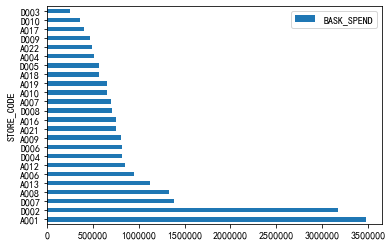

In [96]:
a=basket2.groupby('STORE_CODE')['BASK_SPEND'].sum().reset_index().sort_values(by = 'BASK_SPEND',ascending = False)#商店按消费额大小排序
a.set_index('STORE_CODE',inplace=True)
#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False
#plt.xlabel('消费总额')
a.plot(kind='barh')

## 商店按结账频数统计 

In [70]:
basket2.loc[:,'STORE_CODE'].value_counts()#商店按结账次数大小排序

A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
A021    20555
A010    19543
D006    18572
A016    18279
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: STORE_CODE, dtype: int64

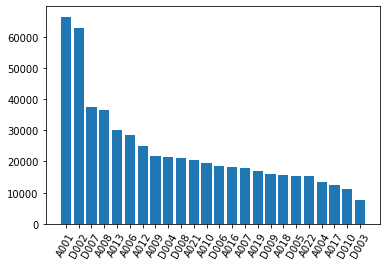

In [71]:
import numpy as np
import matplotlib.pyplot as plt
count =basket2.loc[:,'STORE_CODE'].value_counts()
name = list(count.index)
plt.bar(np.arange(len(name)), count)
# 设置横坐标
plt.xticks(np.arange(len(name)), name, rotation=60)   # rotation 旋转横坐标标签
plt.show()

# 顾客分析

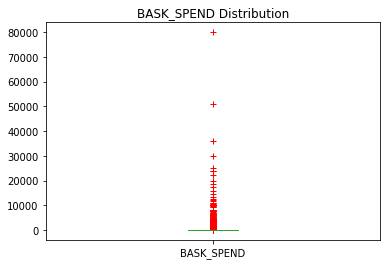

In [72]:
datatemp2=basket2["BASK_SPEND"]
datatemp2.plot(kind='box',title='BASK_SPEND Distribution',sym='r+');

(array([287136., 124141.,  61781.,  33267.,  20008.]),
 array([1.0000e-02, 2.0006e+01, 4.0002e+01, 5.9998e+01, 7.9994e+01,
        9.9990e+01]),
 <a list of 5 Patch objects>)

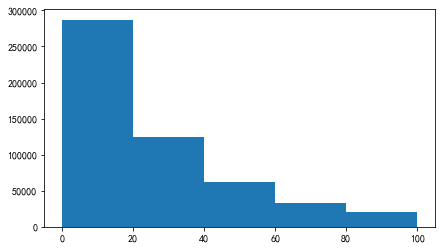

In [99]:
basket3=basket2[basket2['BASK_SPEND']<100]  #剔除离群点
dataset1 = basket3["BASK_SPEND"]
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(dataset1, bins=5)